# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/USER/Desktop/Github/ML100Days/homework/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [7]:
app_train.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [16]:
#挑出要用來進一步分析的欄位:

col_to_analyze = []

for col in app_train:
    if len(app_train[col].unique())>10000:
        col_to_analyze.append(col)
        
len(col_to_analyze)

7

In [33]:
new_df = app_train[col_to_analyze]
new_df.describe()

,SK_ID_CURR,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,EXT_SOURCE_1,EXT_SOURCE_2,TARGET
count,307511.000000,307499.000000,307511.000000,252137.000000,307511.000000,134133.000000,3.068510e+05,307511.000000
mean,278180.518577,27108.573909,16036.995067,-2384.169325,-4986.120328,0.502130,5.143927e-01,0.080729
std,102790.175348,14493.737315,4363.988632,2338.360162,3522.886321,0.211062,1.910602e-01,0.272419
min,100002.000000,1615.500000,7489.000000,-17912.000000,-24672.000000,0.014568,8.173617e-08,0.000000
25%,189145.500000,16524.000000,12413.000000,-3175.000000,-7479.500000,0.334007,3.924574e-01,0.000000
50%,278202.000000,24903.000000,15750.000000,-1648.000000,-4504.000000,0.505998,5.659614e-01,0.000000
75%,367142.500000,34596.000000,19682.000000,-767.000000,-2010.000000,0.675053,6.636171e-01,0.000000
max,456255.000000,258025.500000,25229.000000,0.000000,0.000000,0.962693,8.549997e-01,1.000000


先來看看聘僱時間長短和違約率的關係:

In [34]:
new_df['DAYS_EMPLOYED'] = abs(new_df['DAYS_EMPLOYED'])
new_df['DAYS_EMPLOYED'].describe()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    252137.000000
mean       2384.169325
std        2338.360162
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

In [35]:
#切割成10個區間:

bin_cut = np.linspace(0, 18000, num = 10) 
new_df['DAYS_EMPLOYED_BINNED'] = pd.cut(new_df['DAYS_EMPLOYED'],bin_cut)
new_df['DAYS_EMPLOYED_BINNED'].value_counts()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0.0, 2000.0]         144650
(2000.0, 4000.0]       63601
(4000.0, 6000.0]       24281
(6000.0, 8000.0]        9984
(8000.0, 10000.0]       5073
(10000.0, 12000.0]      2757
(12000.0, 14000.0]      1372
(14000.0, 16000.0]       360
(16000.0, 18000.0]        57
Name: DAYS_EMPLOYED_BINNED, dtype: int64

In [44]:
#樞紐分析一下，看看就職時間長短的10個區間分別有什麼樣的違約率:

DATS_EMPLOYED_groups = new_df.groupby('DAYS_EMPLOYED_BINNED').mean()
DATS_EMPLOYED_groups

,SK_ID_CURR,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,EXT_SOURCE_1,EXT_SOURCE_2,TARGET
DAYS_EMPLOYED_BINNED,,,,,,,,
"(0.0, 2000.0]",278065.688987,27010.475039,13931.623464,924.652900,-4320.083699,0.447043,0.499922,0.104542
"(2000.0, 4000.0]",277953.206931,28725.542489,15103.651499,2856.845396,-4683.013632,0.505561,0.532283,0.071084
"(4000.0, 6000.0]",279201.824184,29411.146740,16263.304930,4851.283926,-5135.103661,0.550468,0.544835,0.054569
"(6000.0, 8000.0]",277927.289062,29231.263071,17121.101362,6920.746194,-5592.724459,0.592172,0.546932,0.047776
"(8000.0, 10000.0]",276772.781786,28064.242460,17930.193771,8861.195939,-6292.146659,0.625853,0.546903,0.044352
"(10000.0, 12000.0]",277296.862894,28570.553863,19387.992383,10889.407327,-6978.569822,0.673018,0.546512,0.044614
"(12000.0, 14000.0]",278936.145773,28689.704082,20685.486152,12814.478863,-7879.458455,0.701323,0.558345,0.024781
"(14000.0, 16000.0]",277216.455556,28626.400000,22315.416667,14723.716667,-8456.788889,0.740825,0.550159,0.016667
"(16000.0, 18000.0]",300346.052632,29020.973684,23642.245614,16497.087719,-8319.403509,0.762872,0.582244,0.017544


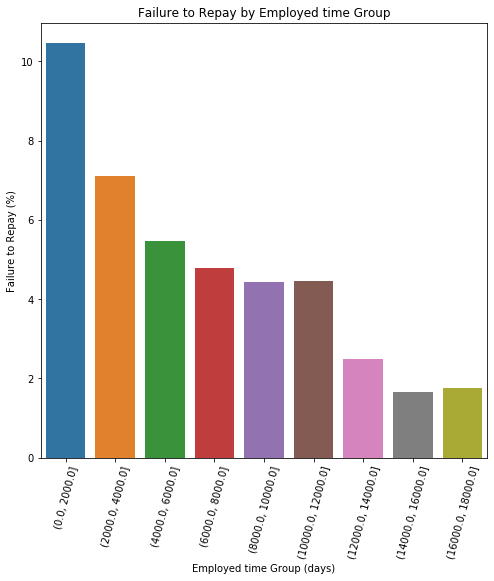

In [46]:
#繪圖:

plt.figure(figsize = (8, 8))

# 以"就職時間長度"區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = DATS_EMPLOYED_groups.index.astype(str)
py = 100 * DATS_EMPLOYED_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Employed time Group (days)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Employed time Group');

再來看看年金變數好了:

In [48]:
new_df['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [49]:
#一樣切割成10個區間:

bin_cut = np.linspace(1600, 260000, num = 10) 
new_df['AMT_ANNUITY_BINNED'] = pd.cut(new_df['AMT_ANNUITY'],bin_cut)
new_df['AMT_ANNUITY_BINNED'].value_counts()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(1600.0, 30311.111]         201616
(30311.111, 59022.222]       96903
(59022.222, 87733.333]        7911
(87733.333, 116444.444]        857
(116444.444, 145155.556]       131
(145155.556, 173866.667]        37
(202577.778, 231288.889]        35
(173866.667, 202577.778]         8
(231288.889, 260000.0]           1
Name: AMT_ANNUITY_BINNED, dtype: int64

In [54]:
#樞紐分析一下，看看年金的10個區間分別有什麼樣的違約率:

ANNUITY_groups = new_df.groupby('AMT_ANNUITY_BINNED')['TARGET'].mean()
ANNUITY_groups

AMT_ANNUITY_BINNED
(1600.0, 30311.111]         0.082166
(30311.111, 59022.222]      0.081164
(59022.222, 87733.333]      0.046644
(87733.333, 116444.444]     0.025671
(116444.444, 145155.556]    0.015267
(145155.556, 173866.667]    0.027027
(173866.667, 202577.778]    0.000000
(202577.778, 231288.889]    0.000000
(231288.889, 260000.0]      0.000000
Name: TARGET, dtype: float64

In [58]:
ANNUITY_groups = new_df.groupby('AMT_ANNUITY_BINNED').mean() #這樣打，下面繪圖才不會出錯找不到TARGET
ANNUITY_groups

,SK_ID_CURR,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,EXT_SOURCE_1,EXT_SOURCE_2,TARGET
AMT_ANNUITY_BINNED,,,,,,,,
"(1600.0, 30311.111]",278221.729039,18934.017613,16101.823814,2310.813110,-5084.667651,0.487181,0.499922,0.082166
"(30311.111, 59022.222]",278124.828953,39950.199545,15898.015232,2496.453221,-4807.529241,0.521842,0.537763,0.081164
"(59022.222, 87733.333]",278914.761598,67131.131399,16017.752244,2624.415594,-4681.693465,0.577641,0.583750,0.046644
"(87733.333, 116444.444]",269664.466744,98186.712952,16468.050175,2926.045273,-4815.302217,0.597225,0.601786,0.025671
"(116444.444, 145155.556]",270550.534351,126876.881679,17100.824427,2942.377358,-5133.755725,0.652949,0.609909,0.015267
"(145155.556, 173866.667]",296240.648649,158283.972973,17024.675676,2742.387097,-5332.351351,0.611545,0.668636,0.027027
"(173866.667, 202577.778]",273137.500000,182971.125000,16716.500000,2880.571429,-3267.000000,0.726815,0.629349,0.000000
"(202577.778, 231288.889]",265091.171429,221277.728571,16539.057143,3846.718750,-4235.657143,0.634706,0.651793,0.000000
"(231288.889, 260000.0]",120926.000000,258025.500000,15176.000000,201.000000,-1529.000000,0.755408,0.706927,0.000000


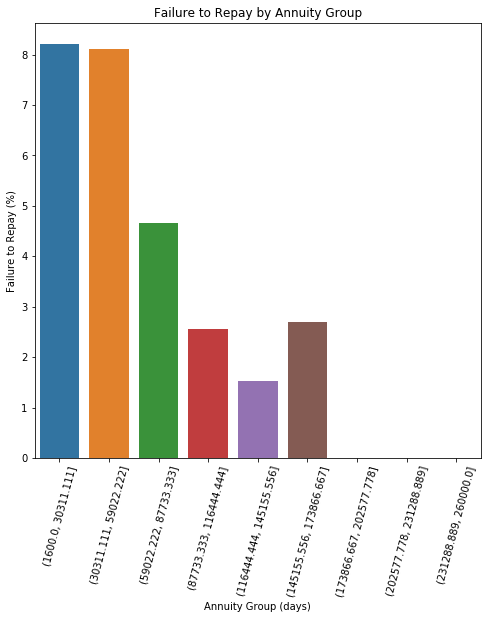

In [59]:
#繪圖:

plt.figure(figsize = (8, 8))

# 以年金區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = ANNUITY_groups.index.astype(str)
py = 100 * ANNUITY_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Annuity Group (days)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Annuity Group');